In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

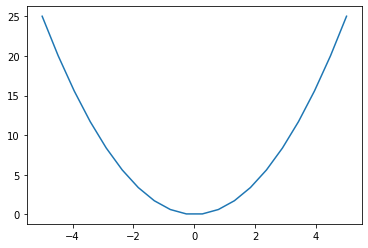

In [26]:
def function(x):
    return x**2

def derivative_function(x):
    return 2*x

x = np.linspace(-5, 5, 20)
y = function(x)

plt.plot(x, y)
plt.show()

In [27]:
def GradientDescent(x0, alpha, n_iter):
    X = []
    for _ in range(n_iter+1):
        X.append(x0)
        x0 = x0 - alpha * derivative_function(x0)
    
    return X

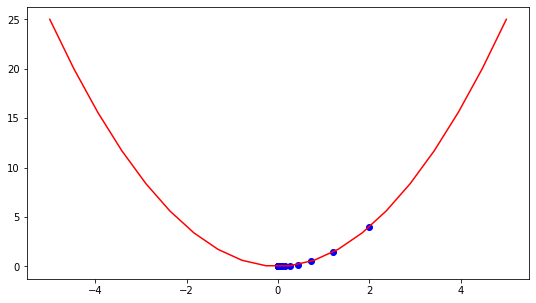

In [28]:
alpha = 0.2
x0 = 2
n_iter = 20

vfunc = np.vectorize(function)

X1 = GradientDescent(x0, alpha, n_iter)
Y1 = vfunc(X1)

plt.figure(figsize=(9, 5))
plt.plot(X1, Y1, 'bo')
plt.plot(x, y, color='r')
plt.show()

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
df.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [30]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

'''
y: given labels
x: observations
w: parameters
'''
def error_function(Y, X, w):
    L = -np.mean(Y * np.log(sigmoid(np.dot(X, w))) + (1-Y) * np.log(1-sigmoid(np.dot(X, w))))
    return L

Y = pd.DataFrame(df['Cho vay'])

X = df.drop(columns = 'Cho vay')
X['x0'] = pd.Series(np.ones(len(X)))
Y.shape

(20, 1)

<ipython-input-30-f338af4eb318>:11: RuntimeWarning: divide by zero encountered in log
  L = -np.mean(Y * np.log(sigmoid(np.dot(X, w))) + (1-Y) * np.log(1-sigmoid(np.dot(X, w))))


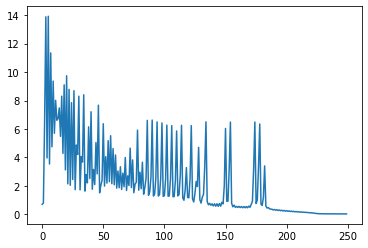

In [31]:
w = pd.DataFrame(np.zeros(shape=X.shape[1]))

alpha = 2
n_iter = 250
L = [] # List of error after each iteration

for _ in range(n_iter):
    err = error_function(Y, X, w)
    L.append(err)
    for i in range(X.shape[1]):
        w[0][i] = w[0][i] - alpha * np.mean((sigmoid(np.dot(X, w)) - Y.to_numpy()).T * X.to_numpy()[:, i])

plt.plot(L)
plt.show()

In [32]:
print('Error: ' + str(L[-1]))
print('Parameters: ' + str(w))

Error: Cho vay    0.020922
dtype: float64
Parameters:            0
0   2.265212
1  14.198568
2 -25.516460


In [33]:
df_test = pd.DataFrame(data = np.array([[2, 3], [1, 8], [5, 5]]), columns = ['Lương', 'Thời gian làm việc'])
df_test['x0'] = np.ones(df_test.shape[0])
df_test

,Lương,Thời gian làm việc,x0
0,2,3,1.0
1,1,8,1.0
2,5,5,1.0


In [34]:
sigmoid(np.dot(df_test, w))

array([[1.],
       [1.],
       [1.]])